In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv ('Ex84.csv', sep = ';')
data = data[data['Gender'] == 'male']
data.head()

,Length,Width,Height,Gender
24,93,74,37,male
25,94,78,35,male
26,96,80,35,male
27,101,84,39,male
28,102,85,38,male


In [3]:
data.drop(columns = ['Gender'], inplace = True)
data.head()

,Length,Width,Height
24,93,74,37
25,94,78,35
26,96,80,35
27,101,84,39
28,102,85,38


In [4]:
data = data.apply(np.log, inplace = True)
data.head()

,Length,Width,Height
24,4.532599,4.304065,3.610918
25,4.543295,4.356709,3.555348
26,4.564348,4.382027,3.555348
27,4.615121,4.430817,3.663562
28,4.624973,4.442651,3.637586


In [5]:
np.mean(data)

Length    4.725444
Width     4.477574
Height    3.703186
dtype: float64

In [6]:
cov = np.cov(data, rowvar = False, bias = False)
cov

array([[0.011072  , 0.00801914, 0.00815965],
       [0.00801914, 0.00641673, 0.00600527],
       [0.00815965, 0.00600527, 0.00677276]])

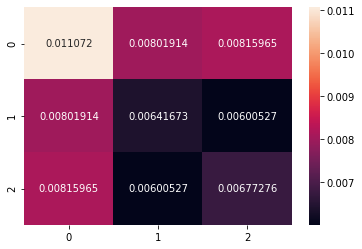

In [7]:
sns.heatmap(cov, annot=True, fmt='g')

In [8]:
autovalor, autovetor = np.linalg.eig(cov)
autovalor

array([0.02330335, 0.00035984, 0.0005983 ])

In [9]:
autovetor

array([[-0.68310233, -0.71269743, -0.15947908],
       [-0.51021953,  0.62195341, -0.59401177],
       [-0.52253923,  0.32440148,  0.78848997]])

Text(0, 0.5, 'Autovalor')

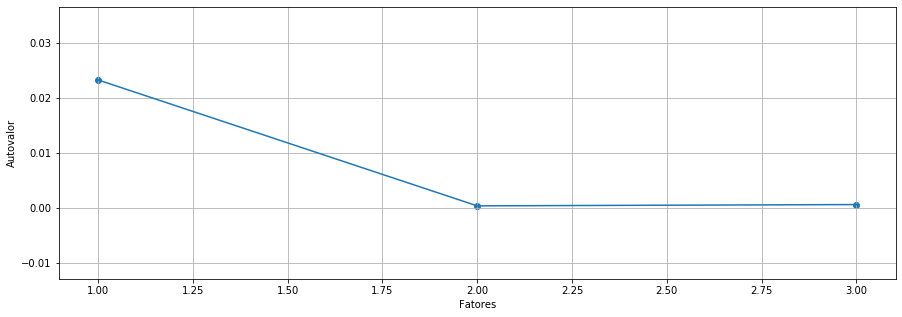

In [17]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.scatter(range(1,len(autovalor)+1), autovalor)
ax.plot(range(1,len(autovalor)+1), autovalor)
ax.grid()
ax.set_xlabel('Fatores')
ax.set_ylabel('Autovalor')

In [11]:
vartotal = np.sum(autovalor)
vartotal

0.02426148799417313

In [12]:
varacumualda = np.cumsum(autovalor)/vartotal
varacumualda

array([0.96050774, 0.97533931, 1.        ])

In [13]:
plt.plot(x, varacumualda)
plt.xlabel('Numero de Componentes')
plt.ylabel('Variancia Acumulada')
plt.show()

NameError: name 'x' is not defined

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit_transform(data)